# Connecting colab with drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing All the Required Library 
# Pandas, numpy
# spacy and nltk for word parsing 
# regex for removing special language
# Matplotlib and seaborn for graph visualization 

---



In [17]:
import pandas as pd     
import numpy as np      

# For cleaning the text
import spacy            # spacy is newer library than nltk which has more number of word list than nltk
import nltk             # nltk is much efficient than spacy 
from nltk.tokenize import word_tokenize # importing from nltk library 
from nltk.corpus import stopwords       # importing from nltk corpus library
import regex as re      
''' 
A regex pattern is a special language used to represent generic text, numbers or 
symbols so it can be used to extract texts that conform to that pattern. 
A basic example is '\s+'. Here the '\s' matches any whitespace character. 
By adding a '+' notation at the end will make the pattern match at least 1 or more spaces. 
'''
import string

# For visualization
import matplotlib.pyplot as plt     
import seaborn as sns
pd.set_option('display.max_rows', None) # None
pd.set_option('display.max_columns', None)


# For building our model
import sklearn
from tensorflow.keras.layers import Dense     # from tensorflow keras layers importing dense to changing the dimension of the vectors by using every neuron

# Loading tweets dataset

In [13]:
df = pd.read_csv('drive/MyDrive/Final-project/tweets_final_project_data.csv')

# Starting EDA

# Checking for balancing of the target feature 


0    4342
1    3271
Name: target, dtype: int64

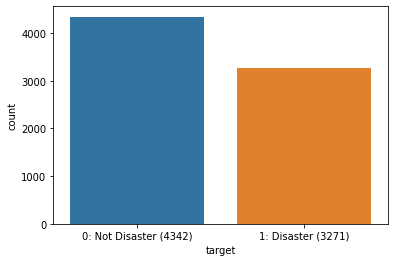

In [14]:
countplt = sns.countplot(x = 'target', data = df)
countplt.set_xticklabels(['0: Not Disaster (4342)', '1: Disaster (3271)'])
df['target'].value_counts()

## Dropping Duplicate Attributes from the data

In [15]:
print(len(df))
df_drop = df.drop_duplicates('text', keep='last')
print(len(df_drop))

7613
7503


# Analyzing the data with Mosiac picture on text feature and seperating that on Binary targets (1,0) to view the difference between emotional words weightage  


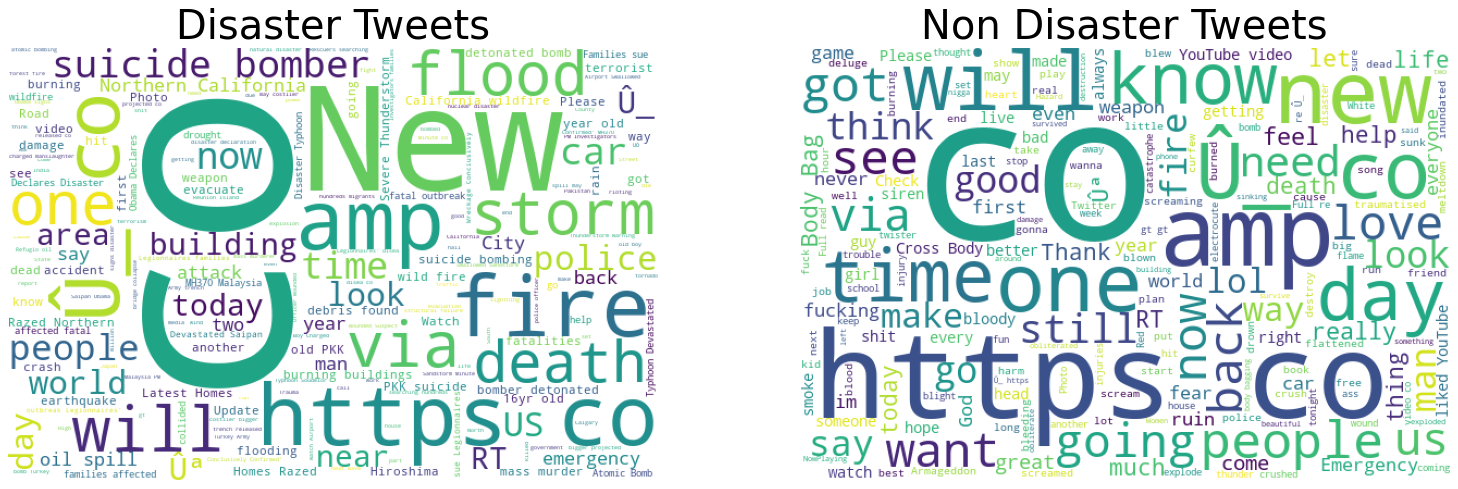

In [16]:
disaster_tweets=df[df['target']==1]['text']
disaster_tweets.values[1]
nondisaster_tweets=df[df['target']==0]['text']
nondisaster_tweets.values[1]
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(nondisaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

## Grouping Keyword with target Feature to analyze the usage of words both in disaster and non-disaster Events





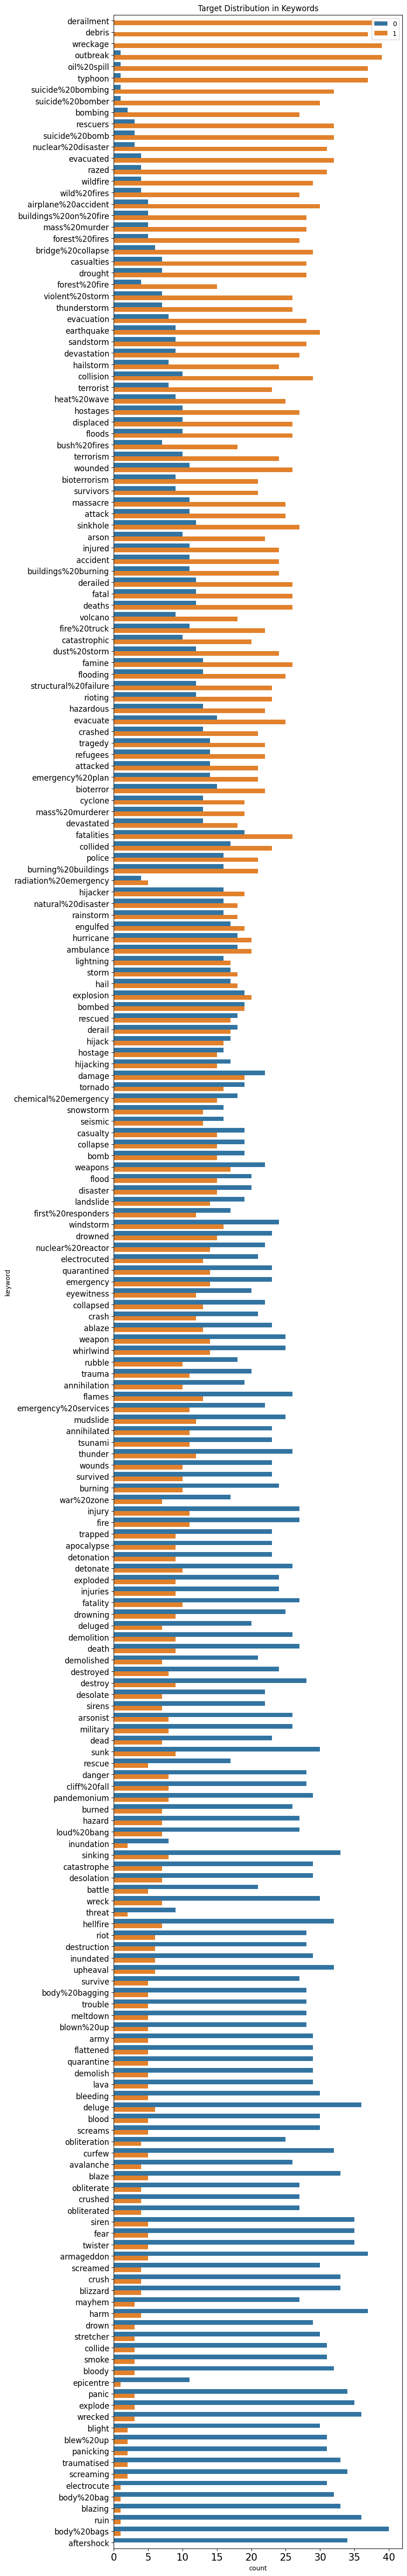

In [19]:
df['target_mean'] = df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)
sns.countplot(y=df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')
plt.show()
df.drop(columns=['target_mean'], inplace=True)

In [ ]:
# df = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
# train.loc[train['id'].isin(ids_with_target_error),'target'] = 0

## Now checking the top 30 locations from where this tweets are generated  

In [20]:
top_30 = df.groupby(['location']).count().text.sort_values(ascending = False)[:30]

Text(0.5, 0, 'number of tweets')

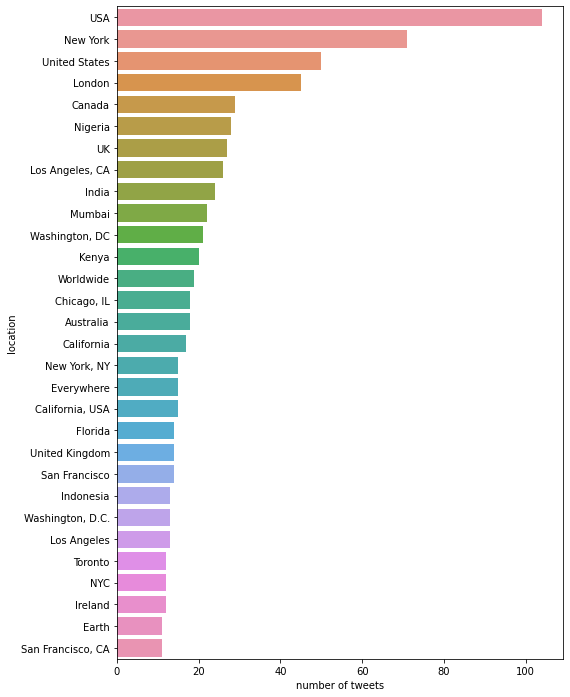

In [21]:
plt.figure(figsize = (8,12))
sns.barplot(x = top_30, y = top_30.index)
plt.xlabel('number of tweets')

## We are using Drop command to delete the 3 columns that are location, keyword and id since it doesn't contain any values while our model 

In [22]:
df.drop(columns = ['location', 'keyword', 'id'], inplace = True)

#Cleaning the Data

## Cleaning the Data with spacy and nltk (natural language toolkit)
## downloading stopword and punctuation from NLTK
## Using both Spacy and nltk to check for the best outcome among that


In [23]:
nlp = spacy.load("en")
sp = spacy.load('en_core_web_sm')

nltk.download('stopwords')
nltk.download('punkt')

# spacy (362 words)
spacy_st = nlp.Defaults.stop_words
# nltk(179 words)
nltk_st = stopwords.words('english')

def clean(tweet, http = True, punc = True, lem = True, stop_w = True):
    
    if http is True:     # deleting pattern https from text attribute
        tweet = re.sub("https?:\/\/t.co\/[A-Za-z0-9]*", '', tweet)

    # stop words
    # in here I changed the placement of lower for those of you who want to use
    # Cased BERT later on.
    if stop_w == 'nltk':         # nltk is more accurate than spacy so we are using nltk but has less numbers of stopwords 
        tweet = [word for word in word_tokenize(tweet) if not word.lower() in nltk_st]
        tweet = ' '.join(tweet)

    elif stop_w == 'spacy':   # spacy has more number of stopwords than nltk nearly 400+
        tweet = [word for word in word_tokenize(tweet) if not word.lower() in spacy_st]
        tweet = ' '.join(tweet)

    # lemmitizing
    if lem == True:      # remove inflectional endings such as "tweets" will become "tweet"
        lemmatized = [word.lemma_ for word in sp(tweet)]
        tweet = ' '.join(lemmatized)

    # punctuation removal
    if punc is True:  # removing all the punctuation and substituting it with blank space
        tweet = tweet.translate(str.maketrans('', '', string.punctuation))
        
    # removing extra space # removing all the Extra spaces that are around words or letters
    tweet = re.sub("\s+", ' ', tweet)
    
    return tweet 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Appling cleaning function to our dataset by creating New Feature

In [24]:
# df['cleaned_text'] = df.text.apply(lambda x: clean(x, lem = True, stop_w = 'spacy', http = True, punc = True))
df['cleaned_text'] = df.text.apply(lambda x: clean(x, lem = True, stop_w = 'nltk', http = True, punc = True))

In [25]:
cleaned_train = df[:df.shape[0]]

# Analyzing the Change in the New text as 'cleaned_text' where we have successfully implemented stopwords, html tags, punctuation and Extra Spaces

In [26]:
cleaned_train.head()

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,Deeds Reason earthquake May allah forgive PRON
1,Forest fire near La Ronge Sask. Canada,1,forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident ask shelter place notify officer evacuation shelter place order expect
3,"13,000 people receive #wildfires evacuation orders in California",1,13000 people receive wildfire evacuation order California
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,get send photo Ruby Alaska smoke wildfire pour school


# importing train_test_split to split the data 
# Tfidfvectorizer to convert raw documents to a matrix of TF-IDF features by multiplying TF & IDF 
# importing SVC model from sklearn
# importing confusion_matrix and classification_report from metrix of sklearn
# importing MultinomialNB.naive_bayes model from sklearn

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

# As X Selecting text feature and as y selecting binary target

In [29]:
X = df.cleaned_text
y = df["target"]

# Creating matrix with tfidf_vectorizer with keeping max_df=0.9 and min_df = 10 

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10)
tfidf_matrix = tfidf_vectorizer.fit_transform(X)
dense = tfidf_matrix.todense()
dense.shape

(7613, 1351)

# from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, f1_score and precision_score

In [31]:
from sklearn.metrics import accuracy_score,r2_score,roc_auc_score,f1_score,precision_score

# Defining function 10 times with different random_state values for different results 

In [32]:
def evaluate(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate1(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate2(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate3(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=300)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate4(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=400)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate5(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate6(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=600)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate7(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=700)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate8(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=800)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))
def evaluate9(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True,stratify=y,random_state=900)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Accuracy : ",roc_auc_score(y_test,y_pred))
    # print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    # print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Final Accuracy : ",precision_score(y_test,y_pred))


### Checking with SVC model

In [33]:
# svm = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)),TfidfTransformer(), SVC(kernel="linear", gamma="auto", C=2))

### Checking with multinomial.naive_bayes model

In [34]:
svm = make_pipeline(TfidfVectorizer(ngram_range=(1,2)),TfidfTransformer(), MultinomialNB(alpha=1) )

### importing model on created function


In [35]:
evaluate(svm)
  print()
evaluate1(svm)
  print()
evaluate2(svm)
  print()
evaluate3(svm)
  print()
evaluate4(svm)
  print()
evaluate5(svm)
  print()
evaluate6(svm)
  print()
evaluate7(svm)
  print()
evaluate8(svm)
  print()
evaluate9(svm)

Accuracy :  0.8007487082146999
Final Accuracy :  0.8643410852713178

Accuracy :  0.77895180849942
Final Accuracy :  0.8473895582329317

Accuracy :  0.77974269745861
Final Accuracy :  0.8793103448275862

Accuracy :  0.7831698829484341
Final Accuracy :  0.8641975308641975

Accuracy :  0.7877254033533693
Final Accuracy :  0.8314606741573034

Accuracy :  0.7827902562480228
Final Accuracy :  0.8672199170124482

Accuracy :  0.789296636085627
Final Accuracy :  0.8791666666666667

Accuracy :  0.7896762627860381
Final Accuracy :  0.8760330578512396

Accuracy :  0.7747337340504059
Final Accuracy :  0.8313725490196079

Accuracy :  0.7621638721923443
Final Accuracy :  0.880184331797235


In [38]:
(0.86+0.85+0.88+0.86+0.83+0.87+0.88+0.88+0.83+0.88)/10*100

86.19999999999999

# **Final Average Answer with randomsearch is 86.19%  **